In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("~/Documents/R/data/BBB_4.csv")
df["animal"] = "4_" + df["animal"].astype(str)

df = df.melt(id_vars="animal",var_name="day",value_name="bbb")
df["treatment"] = df["animal"].apply(lambda x:x[2:-2]).map( 
    {"1":"Control_4","2":"BSP_solution_3.2mpk","3":"BSP_solution_10mpk","4":"BSP_oilsuspension_3.2mpk","5":"BSP_oilsuspension_10mpk"})
df = df[["animal","bbb","treatment","day"]]
df["day"] = df.day.astype(float)
df.describe()

,bbb,day
count,185.000000,185.000000
mean,7.547297,25.400000
std,3.963162,14.103731
min,0.000000,1.000000
25%,8.000000,21.000000
50%,9.000000,28.000000
75%,10.000000,35.000000
max,13.000000,42.000000


In [147]:
df.to_csv("~/Documents/R/data/BBB_4_re.csv",index=False)

In [148]:
#df_merged = pd.read_csv("~/Documents/R/data/BBB_merged.csv")
#df_merged.loc[(df_merged["treatment"] == "5NPlus_3"),"treatment"] = "5NPlus_3_10mpk"
#Saving to csv
#df_merged.to_csv("~/Documents/R/data/BBB_merged_250918.csv",index=False)

In [2]:
df_merged = pd.read_csv("~/Documents/R/data/BBB_merged_250918.csv")

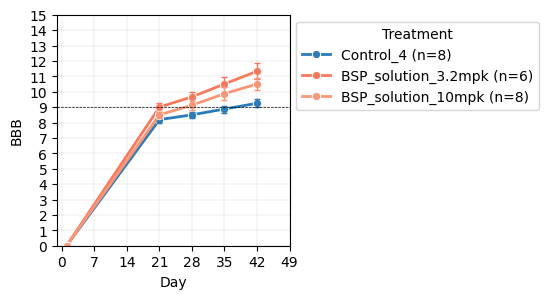

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

blues = sns.color_palette("Blues",6)[2:]
reds = sns.color_palette("Reds",10)[2:]
colors = blues + reds
df_merged["is_control"] = df_merged["treatment"].apply(lambda x:"Control" if "Control" in x else "Bismuth")
df_merged = df_merged.sort_values("is_control",ascending=False)
groups = df_merged["treatment"].unique().tolist()
color_map = {group: colors[i] for i, group in enumerate(groups)}

plt.figure(figsize=(3,3))
ax= sns.lineplot(data=df[~df["treatment"].str.contains("oilsuspension")]
                 , x='day', y='bbb', 
              hue="treatment", marker="o", errorbar="se", err_style="bars",
              palette=color_map, linewidth=2,
             err_kws={'capsize':2,'linewidth': 1})
plt.axhline(y=9, color="black", linestyle='--',linewidth=0.5)

# Customize axis ticks and limits
plt.xticks(ticks=range(0, 56, 7))           # X-axis ticks: 1 to 5
plt.yticks(ticks=range(0, 21))      # Y-axis ticks: 10 to 40 by 5
#plt.xlim(0, 43)                          # X-axis limits
plt.ylim(0, 15)
plt.grid(True, linewidth=0.1, color='gray')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('BBB')

# Show the plot
#plt.tight_layout()
ncount = df_merged.query("day == 21").groupby('treatment').size().to_dict()
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{label} (n={ncount.get(label, 0)})" for label in labels]
ax.legend(handles=handles, labels=new_labels, title="Treatment", loc='upper left',bbox_to_anchor=(1,1))
plt.show()


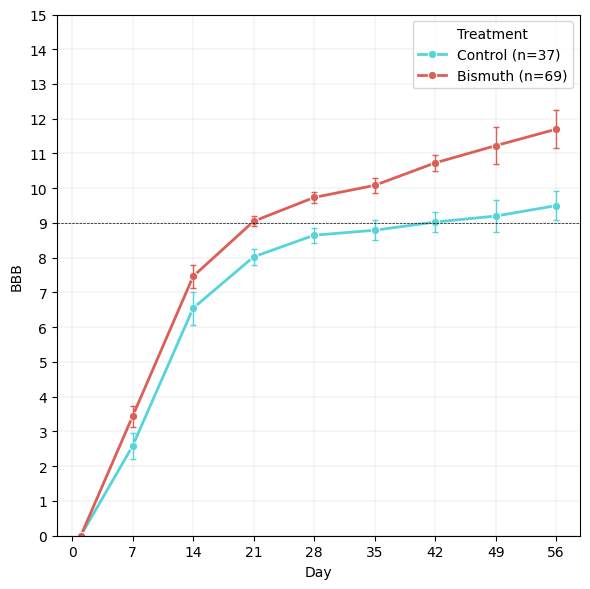

In [59]:
plt.figure(figsize=(6,6))

ax = sns.lineplot(data=df_merged, x='day', y='bbb', 
              hue="is_control", marker="o", errorbar="se", err_style="bars",
              palette=sns.color_palette("hls", 2)[::-1], linewidth=2,
              err_kws={'capsize':2,'linewidth': 1})
plt.axhline(y=9, color="black", linestyle='--',linewidth=0.5)

# Customize axis ticks and limits
plt.xticks(ticks=range(0, 57, 7))           # X-axis ticks: 1 to 5
plt.yticks(ticks=range(0, 22))      
#plt.xlim(0, 57)                          # X-axis limits
plt.ylim(0, 15)
plt.grid(True, linewidth=0.1, color='gray')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('BBB')

# Show the plot
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
ncount = df_merged.query("day == 21").groupby(['is_control']).size().to_dict()
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{label} (n={ncount.get(label, 0)})" for label in labels]
ax.legend(handles=handles, labels=new_labels, title="Treatment")

#plt.show()

{False: '69', True: '37'}